In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Batch normalization (3 points)

Please make use of the model code from Homework 4 question 2 as you work on this question.

1. If your model didn't use batch normalization, add it. If it already had batch normalization, remove it. How does the performance change? Please experiment with different learning rate values, since batch normalization can allow a different range of learning rates to work. You are welcome to write your own batch norm implementaiton or use a pre-existing one from mxnet or pytorch.
1. Plot the squared L2 norm of gradients with respect to parameters over the course of training with and without batch normalization. To do this, you will need to compute the gradient of the loss over some data with respect to each parameter, square these gradients, and sum the result across all parameters. You can compute this value at each training step, or after each epoch. What difference does batch normalization make in terms of the squared L2 norm of gradients?

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


###**Graphs of L2 norms for all three versions of the network are printed at the bottom of the validation loss printing after training.**

### W/O Batch norm or Residual Connections (My original network!!)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# This comes from https://github.com/mtrencseni/pytorch-playground/blob/master/05-cifar-10/CIFAR-10.ipynb
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,   64,  3)
        self.conv2 = nn.Conv2d(64,  128, 3)
        self.conv3 = nn.Conv2d(128, 256, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Soruces:
* https://discuss.pytorch.org/t/how-are-optimizer-step-and-loss-backward-related/7350
* https://discuss.pytorch.org/t/how-to-interpret-the-grad-tensor-in-the-optimizer/34892
* https://discuss.pytorch.org/t/a-problem-about-optimizer-param-groups-in-step-function/14463/3

[1,  2000] loss: 2.210
[1,  4000] loss: 1.868
[1,  6000] loss: 1.675
[1,  8000] loss: 1.542
[1, 10000] loss: 1.442
[1, 12000] loss: 1.384
tensor(30.9988)
[2,  2000] loss: 1.276
[2,  4000] loss: 1.218
[2,  6000] loss: 1.179
[2,  8000] loss: 1.141
[2, 10000] loss: 1.104
[2, 12000] loss: 1.063
tensor(292.8187)
[3,  2000] loss: 0.949
[3,  4000] loss: 0.928
[3,  6000] loss: 0.901
[3,  8000] loss: 0.902
[3, 10000] loss: 0.868
[3, 12000] loss: 0.885
tensor(75.7725)
[4,  2000] loss: 0.741
[4,  4000] loss: 0.737
[4,  6000] loss: 0.765
[4,  8000] loss: 0.774
[4, 10000] loss: 0.720
[4, 12000] loss: 0.729
tensor(143.9673)
[5,  2000] loss: 0.601
[5,  4000] loss: 0.616
[5,  6000] loss: 0.612
[5,  8000] loss: 0.626
[5, 10000] loss: 0.614
[5, 12000] loss: 0.640
tensor(287.7019)
[6,  2000] loss: 0.487
[6,  4000] loss: 0.507
[6,  6000] loss: 0.509
[6,  8000] loss: 0.521
[6, 10000] loss: 0.520
[6, 12000] loss: 0.513
tensor(269.6904)
[7,  2000] loss: 0.376
[7,  4000] loss: 0.417
[7,  6000] loss: 0.417
[7,

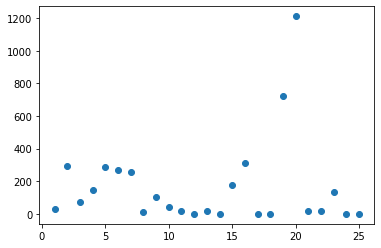

Finished Training


In [ ]:
x_vals = range(1,26)
l2_norms = []

for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    #I think this is computing the right l2 norm:
    #l2_norm = torch.sum(torch.square(optimizer.param_groups[0]['params'][0].grad)).item()
    #print(l2_norm)
    #l2_norms.append(l2_norm)
    
    grad_norm_sum = 0
    for p in net.parameters():
      if p.grad != None:
        grad_norm_sum += torch.sum(torch.square(p.grad))
    l2_norms.append(grad_norm_sum)
    print(grad_norm_sum)
    # THIS IS IMPORTANT: https://discuss.pytorch.org/t/difference-between-gradients-from-network-parameters-and-register-backward-hook/4580/3
    # This is also important: https://discuss.pytorch.org/t/get-the-gradient-of-the-network-parameters/50575
    
plt.scatter(x_vals, l2_norms)
plt.show()

print('Finished Training')

* https://discuss.pytorch.org/t/check-the-norm-of-gradients/27961 


* https://discuss.pytorch.org/t/how-to-get-gradient-of-loss/16955 

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 74.550000 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 77 %
Accuracy of   car : 81 %
Accuracy of  bird : 61 %
Accuracy of   cat : 65 %
Accuracy of  deer : 74 %
Accuracy of   dog : 61 %
Accuracy of  frog : 81 %
Accuracy of horse : 74 %
Accuracy of  ship : 81 %
Accuracy of truck : 86 %


### W/ Batch norm


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# This comes from https://github.com/mtrencseni/pytorch-playground/blob/master/05-cifar-10/CIFAR-10.ipynb
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,   64,  3)
        self.conv1.add_module("BN1", nn.BatchNorm2d(num_features=64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True))
        self.conv2 = nn.Conv2d(64,  128, 3)
        self.conv2.add_module("BN2", nn.BatchNorm2d(num_features=128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True))
        self.conv3 = nn.Conv2d(128, 256, 3)
        self.conv3.add_module("BN3", nn.BatchNorm2d(num_features=256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True))
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Soruces:
* https://discuss.pytorch.org/t/how-are-optimizer-step-and-loss-backward-related/7350
* https://discuss.pytorch.org/t/how-to-interpret-the-grad-tensor-in-the-optimizer/34892
* https://discuss.pytorch.org/t/a-problem-about-optimizer-param-groups-in-step-function/14463/3

[1,  2000] loss: 2.231
[1,  4000] loss: 1.898
[1,  6000] loss: 1.693
[1,  8000] loss: 1.552
[1, 10000] loss: 1.451
[1, 12000] loss: 1.382
tensor(22.5073)
[2,  2000] loss: 1.269
[2,  4000] loss: 1.232
[2,  6000] loss: 1.204
[2,  8000] loss: 1.147
[2, 10000] loss: 1.106
[2, 12000] loss: 1.083
tensor(51.2795)
[3,  2000] loss: 0.951
[3,  4000] loss: 0.958
[3,  6000] loss: 0.922
[3,  8000] loss: 0.911
[3, 10000] loss: 0.889
[3, 12000] loss: 0.872
tensor(34.7096)
[4,  2000] loss: 0.757
[4,  4000] loss: 0.762
[4,  6000] loss: 0.767
[4,  8000] loss: 0.756
[4, 10000] loss: 0.733
[4, 12000] loss: 0.723
tensor(70.2413)
[5,  2000] loss: 0.605
[5,  4000] loss: 0.597
[5,  6000] loss: 0.624
[5,  8000] loss: 0.613
[5, 10000] loss: 0.631
[5, 12000] loss: 0.644
tensor(50.7237)
[6,  2000] loss: 0.471
[6,  4000] loss: 0.515
[6,  6000] loss: 0.521
[6,  8000] loss: 0.541
[6, 10000] loss: 0.508
[6, 12000] loss: 0.537
tensor(43.9823)
[7,  2000] loss: 0.382
[7,  4000] loss: 0.405
[7,  6000] loss: 0.423
[7,  80

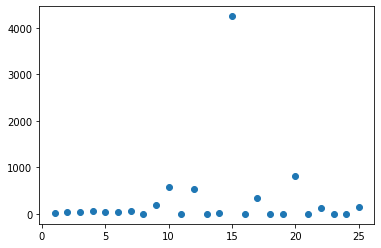

Finished Training


In [ ]:
x_vals = range(1,26)
l2_norms = []

for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    #I think this is computing the right l2 norm:
    #l2_norm = torch.sum(torch.square(optimizer.param_groups[0]['params'][0].grad)).item()
    #print(l2_norm)
    #l2_norms.append(l2_norm)
    
    grad_norm_sum = 0
    for p in net.parameters():
      if p.grad != None:
        grad_norm_sum += torch.sum(torch.square(p.grad))
    l2_norms.append(grad_norm_sum)
    print(grad_norm_sum)
    # THIS IS IMPORTANT: https://discuss.pytorch.org/t/difference-between-gradients-from-network-parameters-and-register-backward-hook/4580/3
    # This is also important: https://discuss.pytorch.org/t/get-the-gradient-of-the-network-parameters/50575
    
plt.scatter(x_vals, l2_norms)
plt.show()

print('Finished Training')

* https://discuss.pytorch.org/t/check-the-norm-of-gradients/27961 


* https://discuss.pytorch.org/t/how-to-get-gradient-of-loss/16955 

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 75.510000 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 82 %
Accuracy of   car : 91 %
Accuracy of  bird : 64 %
Accuracy of   cat : 56 %
Accuracy of  deer : 67 %
Accuracy of   dog : 64 %
Accuracy of  frog : 79 %
Accuracy of horse : 84 %
Accuracy of  ship : 82 %
Accuracy of truck : 81 %


# 2. Residual connections (2 points)

Please make use of the model code from Homework 4 question 2 as you work on this question.

If your model didn't use residual connections, add them. If it already had residual connections, remove them. How does the performance change? Please experiment with applying residual connections around different blocks, where a block is a subset of layers (for example, add a residual connection around a single convolution/nonlinearity combination, or a residual connection around two convolution/nonlinearity combinations). Note that you may need to add 1x1 convolutions in the residual path if your block changes the shape (spatial or number of channels) of the input.



*   https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/02-intermediate/deep_residual_network/main.py 



### W/ RESIDUAL CONNECTIONS (my original network did not have residual connections)


In [62]:
import torch.nn as nn
import torch.nn.functional as F

# This comes from https://github.com/mtrencseni/pytorch-playground/blob/master/05-cifar-10/CIFAR-10.ipynb
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,   64,  3)
        self.conv2 = nn.Conv2d(64,  128, 3)
        self.conv3 = nn.Conv2d(128, 256, 3)

        self.downsample = nn.Conv2d(3, 256, 1, 16)

        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        residual = x
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        residual = self.downsample(residual)
        #print("x.shape")
        #print(x.shape)
        #print("residual.shape")
        #print(residual.shape)

        x += residual

        x = x.view(-1, 64 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

net = Net()

In [63]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Soruces:
* https://discuss.pytorch.org/t/how-are-optimizer-step-and-loss-backward-related/7350
* https://discuss.pytorch.org/t/how-to-interpret-the-grad-tensor-in-the-optimizer/34892
* https://discuss.pytorch.org/t/a-problem-about-optimizer-param-groups-in-step-function/14463/3

[1,  2000] loss: 2.090
[1,  4000] loss: 1.793
[1,  6000] loss: 1.646
[1,  8000] loss: 1.556
[1, 10000] loss: 1.460
[1, 12000] loss: 1.398
tensor(7.4496)
[2,  2000] loss: 1.324
[2,  4000] loss: 1.275
[2,  6000] loss: 1.219
[2,  8000] loss: 1.194
[2, 10000] loss: 1.134
[2, 12000] loss: 1.097
tensor(73.2623)
[3,  2000] loss: 1.033
[3,  4000] loss: 1.012
[3,  6000] loss: 0.984
[3,  8000] loss: 0.961
[3, 10000] loss: 0.951
[3, 12000] loss: 0.923
tensor(60.3675)
[4,  2000] loss: 0.811
[4,  4000] loss: 0.835
[4,  6000] loss: 0.820
[4,  8000] loss: 0.832
[4, 10000] loss: 0.799
[4, 12000] loss: 0.793
tensor(4.7921)
[5,  2000] loss: 0.677
[5,  4000] loss: 0.689
[5,  6000] loss: 0.697
[5,  8000] loss: 0.709
[5, 10000] loss: 0.705
[5, 12000] loss: 0.683
tensor(244.8655)
[6,  2000] loss: 0.549
[6,  4000] loss: 0.593
[6,  6000] loss: 0.596
[6,  8000] loss: 0.593
[6, 10000] loss: 0.619
[6, 12000] loss: 0.597
tensor(2.5447)
[7,  2000] loss: 0.461
[7,  4000] loss: 0.484
[7,  6000] loss: 0.502
[7,  8000

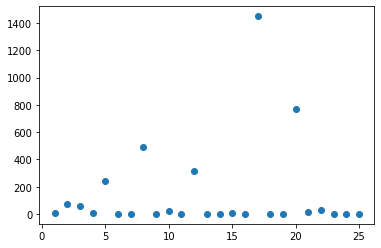

Finished Training


In [64]:
x_vals = range(1,26)
l2_norms = []

for epoch in range(25):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    #I think this is computing the right l2 norm:
    #l2_norm = torch.sum(torch.square(optimizer.param_groups[0]['params'][0].grad)).item()
    #print(l2_norm)
    #l2_norms.append(l2_norm)
    
    grad_norm_sum = 0
    for p in net.parameters():
      if p.grad != None:
        grad_norm_sum += torch.sum(torch.square(p.grad))
    l2_norms.append(grad_norm_sum)
    print(grad_norm_sum)
    # THIS IS IMPORTANT: https://discuss.pytorch.org/t/difference-between-gradients-from-network-parameters-and-register-backward-hook/4580/3
    # This is also important: https://discuss.pytorch.org/t/get-the-gradient-of-the-network-parameters/50575
    
plt.scatter(x_vals, l2_norms)
plt.show()

print('Finished Training')

* https://discuss.pytorch.org/t/check-the-norm-of-gradients/27961 


* https://discuss.pytorch.org/t/how-to-get-gradient-of-loss/16955 

In [65]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %f %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 75.160000 %


In [66]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 81 %
Accuracy of   car : 85 %
Accuracy of  bird : 66 %
Accuracy of   cat : 46 %
Accuracy of  deer : 71 %
Accuracy of   dog : 70 %
Accuracy of  frog : 81 %
Accuracy of horse : 79 %
Accuracy of  ship : 85 %
Accuracy of truck : 83 %


## Relfections on Batch normalization



*   Batch norm made my accuracy go up, and throughout my tinkering (and reading ML literature), I found that it can generally support networks with a higher learning rate (for my specific implementation, I ended up using the same learning rate for both networks (with and without batch norm) 
*   Batch norm made my L2 norm of the gradients lower, and generally more consistant for my network.



## Reflections on Residual Connections



*   Adding residual connections into my network made the accuracy go up. I also experimented with different resNet architectures (un-related to the network I built myself). What I noticed was that it trained much quicked, and achieved a much higher accuracy with fewer ephocs (One particular archintecture which I linked above as a source got me 80% accuracy in 10 ephocs, while the basic architecture I originally built without residual connections gets 75% after 25 ephocs)
*   Residuals connections, like batch norm, made my L2 norm of the gradients lower and generally more consistant for my network as well.

